In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

/home/tomek/.virtualenvs/ib/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
data = pd.read_pickle('freeze/backtest/candles_20210114_19_34_NQU0.pickle')

In [3]:
data

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,
2019-12-23 07:09:30,True,8710.75,8723.75,8707.50,8717.75,8719.416509,8717.75,12004,NaN,NaN,16.250000,0,NaN,0
2019-12-23 11:32:30,True,8718.00,8722.50,8712.50,8722.00,8716.619850,8722.00,12028,NaN,NaN,13.062500,0,NaN,0
2019-12-23 14:11:30,True,8722.25,8742.50,8718.50,8734.75,8730.818032,8734.75,12059,8727.144737,NaN,16.855119,0,NaN,0
2019-12-23 15:27:30,True,8734.75,8743.25,8729.50,8732.25,8735.908331,8732.25,12036,8729.265385,NaN,16.031654,0,NaN,0
2019-12-23 15:34:00,True,8732.00,8734.75,8722.75,8730.75,8728.443722,8730.75,12118,8729.835308,NaN,15.159554,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-26 21:46:00,False,11937.25,11954.00,11936.00,11953.75,11944.155307,11953.75,12315,11937.087396,11735.870023,26.420507,0,1.0,0
2020-08-26 21:54:30,False,11953.75,11970.00,11951.00,11963.00,11960.998836,11963.00,12289,11945.724931,11739.624237,26.129507,1,1.0,1
2020-08-26 22:00:00,False,11963.25,11974.50,11962.00,11969.00,11968.541789,11969.00,12979,11953.483287,11743.415572,25.595016,1,1.0,1


In [6]:
data.loc['20200720 15:00':].head(20)

,backfill,open,high,low,close,weighted_price,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,,
2020-07-20 15:31:00,False,10667.75,10678.25,10654.25,10668.75,10666.406034,10668.75,12604,10647.189362,10609.498055,34.952321,1,1.0,1
2020-07-20 15:35:30,False,10669.00,10684.75,10635.00,10635.25,10662.114088,10635.25,13284,10643.209575,10609.923707,35.532622,0,1.0,0
2020-07-20 15:39:30,False,10634.75,10641.75,10605.75,10639.50,10624.878177,10639.50,12409,10641.973050,10610.412571,35.550951,0,1.0,0
2020-07-20 15:45:30,False,10639.00,10649.25,10611.75,10646.75,10627.819615,10646.75,12507,10643.565367,10611.013190,35.627384,0,1.0,0
2020-07-20 15:52:30,False,10646.75,10672.50,10642.00,10664.00,10657.908334,10664.00,12305,10650.376911,10611.889005,35.426310,0,1.0,0
2020-07-20 15:58:00,False,10664.25,10695.00,10663.50,10675.00,10682.188712,10675.00,12037,10658.584607,10612.932162,35.272337,1,1.0,1
2020-07-20 16:05:30,False,10675.00,10713.75,10670.50,10713.50,10690.880326,10713.50,14640,10676.889738,10614.594440,35.585187,1,1.0,1
2020-07-20 16:13:30,False,10713.50,10731.75,10707.50,10730.25,10717.740569,10730.25,12639,10694.676492,10616.506102,35.140670,1,1.0,1
2020-07-20 16:23:00,False,10730.25,10749.75,10720.50,10746.25,10734.908839,10746.25,12502,10711.867661,10618.650629,34.909663,1,1.0,1


In [7]:
all = pd.read_pickle('freeze/backtest/all_bars_20210114_19_34_NQU0.pickle')

In [15]:
all

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-12-23 00:00:00,8710.75,8717.00,8707.50,8710.50,453,8711.475,171
2019-12-23 00:00:30,8710.75,8713.00,8710.75,8712.25,95,8712.275,61
2019-12-23 00:01:00,8712.75,8715.00,8712.75,8714.50,166,8713.975,99
2019-12-23 00:01:30,8714.50,8717.50,8714.25,8715.75,192,8716.375,97
2019-12-23 00:02:00,8715.50,8718.25,8715.25,8718.00,140,8716.850,72
...,...,...,...,...,...,...,...
2020-08-28 04:13:30,11967.75,11968.00,11967.00,11967.50,13,11967.525,12
2020-08-28 04:14:00,11967.25,11970.00,11967.00,11970.00,51,11968.775,37
2020-08-28 04:14:30,11969.00,11970.50,11969.00,11970.00,29,11969.950,20


In [20]:
i = all.loc['200720 15:58': '20200721'].copy()
del i['volume']
del i['average']
del i['barCount']
i['max'] = i.max(axis=1)
i['hw'] = i['max'].cummax()
i

,open,high,low,close,max,hw
date,,,,,,
2020-07-20 15:58:00,10678.75,10681.75,10673.25,10675.00,10681.75,10681.75
2020-07-20 15:58:30,10675.00,10681.25,10673.50,10681.25,10681.25,10681.75
2020-07-20 15:59:00,10681.50,10684.50,10675.75,10681.25,10684.50,10684.50
2020-07-20 15:59:30,10680.50,10684.50,10676.50,10681.75,10684.50,10684.50
2020-07-20 16:00:00,10682.50,10690.25,10682.50,10683.75,10690.25,10690.25
...,...,...,...,...,...,...
2020-07-21 22:57:30,10847.25,10848.25,10847.25,10848.00,10848.25,11058.00
2020-07-21 22:58:00,10847.75,10848.00,10847.00,10847.50,10848.00,11058.00
2020-07-21 22:58:30,10848.00,10848.50,10847.50,10848.00,10848.50,11058.00


In [25]:
i['trigger'] = 10675.25 + 1.5 * 35.272337 
i['sl'] = i['hw'] - 35.272337
i['sl_post_t'] = i['hw'] - (2.5 * 35.272337)
i

,open,high,low,close,max,hw,sl,trigger,sl_post_t
date,,,,,,,,,
2020-07-20 15:58:00,10678.75,10681.75,10673.25,10675.00,10681.75,10681.75,10646.477663,10728.158505,10593.569158
2020-07-20 15:58:30,10675.00,10681.25,10673.50,10681.25,10681.25,10681.75,10646.477663,10728.158505,10593.569158
2020-07-20 15:59:00,10681.50,10684.50,10675.75,10681.25,10684.50,10684.50,10649.227663,10728.158505,10596.319158
2020-07-20 15:59:30,10680.50,10684.50,10676.50,10681.75,10684.50,10684.50,10649.227663,10728.158505,10596.319158
2020-07-20 16:00:00,10682.50,10690.25,10682.50,10683.75,10690.25,10690.25,10654.977663,10728.158505,10602.069158
...,...,...,...,...,...,...,...,...,...
2020-07-21 22:57:30,10847.25,10848.25,10847.25,10848.00,10848.25,11058.00,11022.727663,10728.158505,10969.819158
2020-07-21 22:58:00,10847.75,10848.00,10847.00,10847.50,10848.00,11058.00,11022.727663,10728.158505,10969.819158
2020-07-21 22:58:30,10848.00,10848.50,10847.50,10848.00,10848.50,11058.00,11022.727663,10728.158505,10969.819158


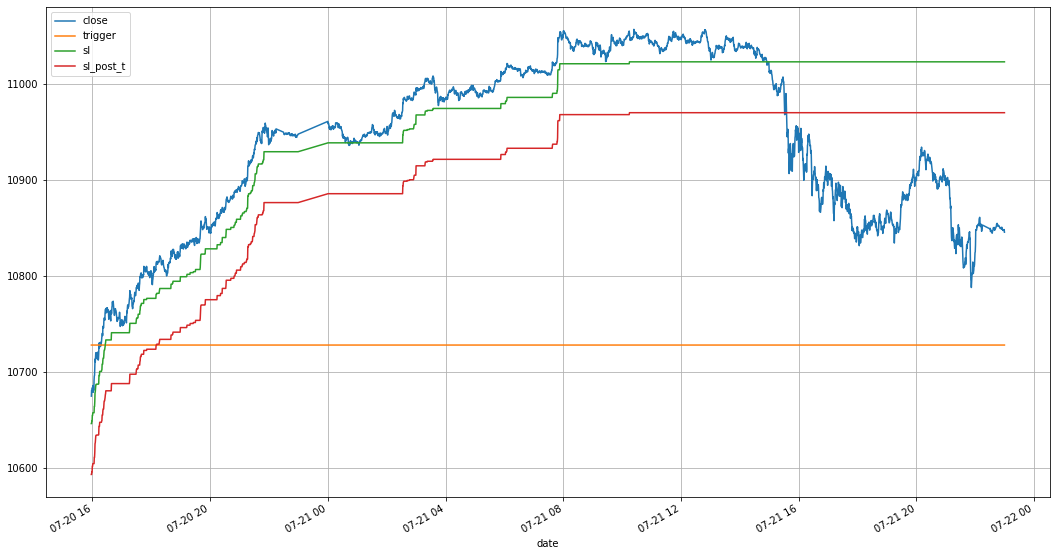

In [27]:
i[['close', 'trigger', 'sl', 'sl_post_t']].plot(figsize=(18,10), grid=True);

In [28]:
i['hit'] = (i['close'] < i['sl_post_t'])
i

,open,high,low,close,max,hw,sl,trigger,sl_post_t,hit
date,,,,,,,,,,
2020-07-20 15:58:00,10678.75,10681.75,10673.25,10675.00,10681.75,10681.75,10646.477663,10728.158505,10593.569158,False
2020-07-20 15:58:30,10675.00,10681.25,10673.50,10681.25,10681.25,10681.75,10646.477663,10728.158505,10593.569158,False
2020-07-20 15:59:00,10681.50,10684.50,10675.75,10681.25,10684.50,10684.50,10649.227663,10728.158505,10596.319158,False
2020-07-20 15:59:30,10680.50,10684.50,10676.50,10681.75,10684.50,10684.50,10649.227663,10728.158505,10596.319158,False
2020-07-20 16:00:00,10682.50,10690.25,10682.50,10683.75,10690.25,10690.25,10654.977663,10728.158505,10602.069158,False
...,...,...,...,...,...,...,...,...,...,...
2020-07-21 22:57:30,10847.25,10848.25,10847.25,10848.00,10848.25,11058.00,11022.727663,10728.158505,10969.819158,True
2020-07-21 22:58:00,10847.75,10848.00,10847.00,10847.50,10848.00,11058.00,11022.727663,10728.158505,10969.819158,True
2020-07-21 22:58:30,10848.00,10848.50,10847.50,10848.00,10848.50,11058.00,11022.727663,10728.158505,10969.819158,True


In [42]:
i.tail(900).head(50)

,open,high,low,close,max,hw,sl,trigger,sl_post_t,hit
date,,,,,,,,,,
2020-07-21 15:15:00,10996.75,10997.25,10991.50,10992.50,10997.25,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:15:30,10992.00,10994.50,10991.25,10992.00,10994.50,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:16:00,10991.50,10992.75,10990.25,10992.00,10992.75,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:16:30,10991.75,10992.50,10986.75,10987.50,10992.50,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:17:00,10987.75,10991.25,10987.75,10988.75,10991.25,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:17:30,10988.50,10990.00,10988.00,10989.50,10990.00,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:18:00,10989.75,10990.75,10987.50,10988.00,10990.75,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:18:30,10987.75,10995.00,10987.50,10992.00,10995.00,11058.0,11022.727663,10728.158505,10969.819158,False
2020-07-21 15:19:00,10992.00,10997.25,10991.75,10995.25,10997.25,11058.0,11022.727663,10728.158505,10969.819158,False


In [4]:
d = data.reset_index()

In [5]:
d['secs'] = d.date.diff()[1:].apply(lambda x: x.seconds)
d

,date,open,high,low,close,volume,average,barCount,secs
0,2018-12-24 00:00:00,6049.75,6049.75,6020.00,6021.00,961,6034.825,654,NaN
1,2018-12-24 00:01:00,6021.25,6034.75,6021.25,6030.75,491,6028.250,368,60.0
2,2018-12-24 00:02:00,6032.50,6043.00,6032.50,6040.50,510,6038.225,299,60.0
3,2018-12-24 00:03:00,6041.00,6043.00,6036.00,6040.25,283,6039.825,194,60.0
4,2018-12-24 00:04:00,6039.25,6043.25,6039.25,6042.25,185,6041.325,126,60.0
...,...,...,...,...,...,...,...,...,...
35051,2019-01-30 22:55:00,6843.25,6845.25,6842.25,6845.00,162,6843.750,82,60.0
35052,2019-01-30 22:56:00,6844.75,6845.25,6843.75,6844.00,115,6844.400,76,60.0
35053,2019-01-30 22:57:00,6843.50,6843.75,6841.00,6841.75,202,6842.625,88,60.0
35054,2019-01-30 22:58:00,6841.50,6842.00,6840.50,6840.75,77,6841.000,55,60.0


In [6]:
d.loc[1150:].head(10)

,date,open,high,low,close,volume,average,barCount,secs
1150,2018-12-24 19:10:00,5906.25,5908.25,5902.00,5906.50,539,5904.700,337,60.0
1151,2018-12-24 19:11:00,5906.25,5910.25,5902.25,5902.75,675,5907.900,375,60.0
1152,2018-12-24 19:12:00,5902.75,5903.75,5895.75,5901.25,385,5899.850,268,60.0
1153,2018-12-24 19:13:00,5900.25,5901.25,5888.75,5893.50,688,5892.450,444,60.0
1154,2018-12-24 19:14:00,5893.25,5898.50,5889.00,5894.00,1001,5893.725,447,60.0
1155,2018-12-26 00:00:00,5902.00,5916.25,5901.50,5915.00,625,5909.250,381,17160.0
1156,2018-12-26 00:01:00,5915.75,5915.75,5906.50,5911.50,191,5910.275,136,60.0
1157,2018-12-26 00:02:00,5911.50,5912.25,5908.75,5911.00,146,5910.525,99,60.0
1158,2018-12-26 00:03:00,5911.25,5912.25,5909.00,5910.50,76,5910.675,60,60.0
1159,2018-12-26 00:04:00,5910.75,5914.00,5909.75,5912.25,112,5911.575,69,60.0


In [7]:
d[(d.secs != 60) & (d.secs != 960) & (d.secs != 3660)]

,date,open,high,low,close,volume,average,barCount,secs
0,2018-12-24,6049.75,6049.75,6020.0,6021.00,961,6034.825,654,NaN
1155,2018-12-26,5902.00,5916.25,5901.5,5915.00,625,5909.250,381,17160.0
6616,2019-01-02,6349.50,6355.75,6344.0,6353.00,332,6348.950,188,0.0
25501,2019-01-22,6755.50,6765.75,6752.5,6758.25,496,6758.150,287,18060.0


In [8]:
z = d[d.secs == 0]
len(z)

1

In [9]:
z.values

array([[Timestamp('2019-01-02 00:00:00'), 6349.5, 6355.75, 6344.0,
        6353.0, 332, 6348.95, 188, 0.0]], dtype=object)

In [10]:
data.loc['2019-01-03 22:55:00':].head(10)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-03 22:55:00,6172.75,6172.75,6170.50,6170.75,20,6171.375,15
2019-01-03 22:56:00,6170.75,6171.00,6168.50,6171.00,62,6169.950,35
2019-01-03 22:57:00,6171.00,6172.00,6170.75,6171.00,24,6171.225,17
2019-01-03 22:58:00,6171.00,6172.00,6170.75,6171.00,20,6171.175,17
2019-01-03 22:59:00,6170.75,6172.25,6170.50,6172.25,39,6171.300,32
2019-01-04 00:00:00,6168.75,6174.25,6163.50,6174.00,191,6169.275,155
2019-01-04 00:01:00,6174.00,6176.75,6173.50,6174.25,134,6175.075,107
2019-01-04 00:02:00,6174.00,6174.00,6170.25,6171.50,88,6171.650,69
2019-01-04 00:03:00,6172.00,6174.75,6172.00,6174.25,62,6173.625,43


In [11]:
data.loc['2019-01-02 22:58:00':].head(10)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-01-02 22:58:00,6266.25,6272.50,6266.00,6266.25,288,6268.075,137
2019-01-02 22:59:00,6266.25,6268.25,6261.25,6261.25,181,6264.975,122
2019-01-03 00:00:00,6242.75,6244.00,6227.50,6232.50,855,6236.875,559
2019-01-03 00:01:00,6232.50,6240.75,6232.25,6236.00,431,6236.525,297
2019-01-03 00:02:00,6234.50,6236.00,6223.25,6224.50,508,6228.000,338
2019-01-03 00:03:00,6224.50,6231.00,6223.75,6226.75,363,6227.450,242
2019-01-03 00:04:00,6225.75,6226.75,6216.25,6222.00,306,6222.650,234
2019-01-03 00:05:00,6221.50,6222.00,6212.75,6220.75,424,6217.475,277
2019-01-03 00:06:00,6220.50,6227.75,6220.25,6224.25,247,6224.225,156


In [12]:
data.iloc[700:].head(50)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-12-24 11:40:00,6101.25,6101.75,6099.50,6100.00,47,6100.750,32
2018-12-24 11:41:00,6100.00,6101.50,6099.00,6101.25,52,6100.250,40
2018-12-24 11:42:00,6100.75,6101.25,6099.75,6100.25,39,6100.375,32
2018-12-24 11:43:00,6100.50,6102.50,6100.50,6101.75,42,6101.425,26
2018-12-24 11:44:00,6101.50,6102.75,6101.25,6102.00,24,6102.000,21
2018-12-24 11:45:00,6102.00,6102.00,6100.25,6100.75,21,6100.875,18
2018-12-24 11:46:00,6100.75,6103.50,6100.50,6103.25,27,6101.900,25
2018-12-24 11:47:00,6102.75,6103.75,6101.00,6103.50,42,6102.025,29
2018-12-24 11:48:00,6103.75,6105.00,6103.75,6104.75,72,6104.550,46


In [13]:
df=data.loc['2020-05-26 12:01':].head(50)
df

,open,high,low,close,volume,average,barCount
date,,,,,,,


In [14]:
df.open[0], df.high.max(), df.low.min(), df.close[-1], df.volume.sum()

IndexError: index out of bounds

In [ ]:
data

In [ ]:
data.loc['2020-05-21 10:44:30':].head(50)

In [ ]:
data[data.index.duplicated()]

In [ ]:
df=data.loc['2020-05-26 11:46:30':'2020-05-26 12:32:30']
df

In [ ]:
df.open[0], df.high.max(), df.low.min(), df.close[-1], df.volume.sum()